<a href="https://colab.research.google.com/github/Kopfgeldjaeger/Medium_blogs_code/blob/master/2_talos_grid_search/LeNet_Gridsearch_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi
!pip install talos

Wed Sep 23 20:52:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!mkdir -p dataset
!unzip /content/gdrive/My\ Drive/Colab\ Notebooks/blogs_medium/cat_dog.zip -d dataset/  

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3715.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3716.jpg  
  inflating: dataset/training_set/training_set/cats/cat.3717.jpg  
  inflating:

In [ ]:
%tensorflow_version 2.x
import os
import tensorflow as tf
print(tf.__version__)
import numpy as np
import random as python_random
np.random.seed(42)
python_random.seed(42)
tf.random.set_random_seed(42)

1.14.0


In [ ]:
import keras
import glob
import os
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,  array_to_img
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from keras import optimizers
from keras.models import Sequential
import numpy as np
image_size=(100,100)
train_cats = glob.glob('dataset/training_set/training_set/cats/*.jpg')
train_dogs = glob.glob('dataset/training_set/training_set/dogs/*.jpg')
train_files = [fn for fn in train_cats]+[fn for fn in train_dogs]
print(len(train_files))
train_imgs = [img_to_array(load_img(img, target_size=image_size)) for img in train_files]
train_imgs = np.array(train_imgs)
print(train_imgs.shape)
train_labels= [0 for i in range(len(train_cats))]+[1 for i in range(len(train_dogs))]
print(len(train_labels))
print(train_labels)

Using TensorFlow backend.


8005
(8005, 100, 100, 3)
8005
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
val_cats = glob.glob('dataset/test_set/test_set/cats/*.jpg')
val_dogs = glob.glob('dataset/test_set/test_set/dogs/*.jpg')
val_files = [fn for fn in val_cats]+[fn for fn in val_dogs]
val_imgs = [img_to_array(load_img(img, target_size=image_size)) for img in val_files]
val_imgs = np.array(val_imgs)
print(val_imgs.shape)
val_labels= [0 for i in range(len(val_cats))]+[1 for i in range(len(val_dogs))]
print(len(val_labels))
print(val_labels)

(2023, 100, 100, 3)
2023
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
num_classes = 2
epochs = 10
input_shape = (100,100,3)

# encode text category labels
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

train_labels_array = np.array(train_labels)
# integer encode
le = LabelEncoder()
train_integer_encoded = le.fit_transform(train_labels_array)

# binary encode
ohe = OneHotEncoder(sparse=False)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
train_labels_ohe = ohe.fit_transform(train_integer_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
validation_labels_array = np.array(val_labels)

validation_integer_encoded = le.fit_transform(validation_labels_array)

# binary encode
ohe = OneHotEncoder(sparse=False)
validation_integer_encoded = validation_integer_encoded.reshape(len(validation_integer_encoded), 1)
validation_labels_ohe = ohe.fit_transform(validation_integer_encoded)

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = val_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [ ]:
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras import optimizers

def lenet_5(in_shape=(100,100,3), n_classes=2):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(filters=20, kernel_size=5,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=5,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(500, activation='relu',kernel_initializer='glorot_uniform')(flatten)
    preds = layers.Dense(2, activation='softmax',kernel_initializer='glorot_uniform')(dense1)
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

if __name__ == '__main__':
    model = lenet_5()
    print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 20)      1520      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 50)        25050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 31250)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1562

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("lenet.h5",monitor='val_acc',verbose=1,save_best_only=True,
                             save_weights_only= False,
                             mode ='auto',period=1)

history = model.fit(x=train_imgs_scaled, y=train_labels_ohe,
                    validation_data=(validation_imgs_scaled, validation_labels_ohe),
                    batch_size=200,
                    epochs=10,
                    callbacks=[checkpoint],
                    shuffle=True)
             

Train on 8005 samples, validate on 2023 samples
Epoch 1/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.9433 - accuracy: 0.5124 - val_loss: 0.6923 - val_accuracy: 0.5240
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8005/8005 [==============================] - 96s 12ms/step - loss: 0.6886 - accuracy: 0.5673 - val_loss: 0.7077 - val_accuracy: 0.5027
Epoch 3/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6739 - accuracy: 0.5953 - val_loss: 0.6484 - val_accuracy: 0.6085
Epoch 4/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6332 - accuracy: 0.6396 - val_loss: 0.6048 - val_accuracy: 0.6787
Epoch 5/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5886 - accuracy: 0.6894 - val_loss: 0.5987 - val_accuracy: 0.6708
Epoch 6/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5569 - accuracy: 0.7134 - val_loss: 0.5656 - val_accuracy: 0.7232
Epoch 7/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5229 - accuracy: 0.7375 - val_loss: 0.5799 - val_accuracy: 0.7158
Epoch 8/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.4661 - accuracy: 0.7760 - val_loss: 0.5550 - val_accura

KeyError: ignored

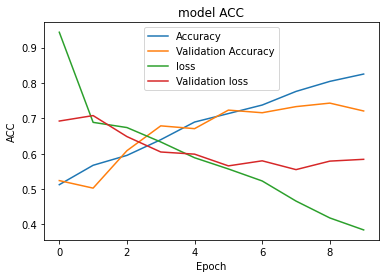

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"]) 
plt.plot(history.history["val_loss"]) 
plt.title("model ACC")
plt.ylabel("ACC")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation loss"])
plt.show()

In [ ]:
from keras.optimizers import Adam,sgd
def lenet_model(x_train, y_train,x_val, y_val, params):
    in_layer = layers.Input((100,100,3))
    conv1 = layers.Conv2D(filters=20, kernel_size=5,
                          padding='same', activation='relu')(in_layer)
    pool1 = layers.MaxPool2D()(conv1)
    conv2 = layers.Conv2D(filters=50, kernel_size=5,
                          padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D()(conv2)
    flatten = layers.Flatten()(pool2)
    dense1 = layers.Dense(params['first_hidden_layer'], activation='relu')(flatten)
    dropout1 = layers.Dropout(params['dropout'])(dense1)
    preds = layers.Dense(2, activation='softmax')(dropout1)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=params['opt'](lr=lr_normalizer(params['lr'],params['opt'])),
	              metrics=["acc"])

    steps_per_epoch = int(np.ceil(train_imgs.shape[0] / 20)) - 1
    history = model.fit(x=train_imgs_scaled, y=train_labels_ohe,
                    validation_data=(validation_imgs_scaled, validation_labels_ohe),
                            batch_size=200,
                            epochs=10,
                            callbacks=[talos.utils.ExperimentLogCallback('kgt', params)],
                            verbose=1)
    return history, model

In [ ]:
p = {'first_hidden_layer': [500],
     'opt': [Adam, sgd],
     'dropout': [0,0.5],
     'weight_regulizer':[None],
     'lr': [1],
     'emb_output_dims': [None],
     'kernel_initializer':["glorot_uniform"]}

In [ ]:
#!pip install talos
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import talos
from talos.model.normalizers import lr_normalizer


t = talos.Scan(x=train_imgs_scaled,
               y=train_labels_ohe,
              model=lenet_model,
              experiment_name= 'kgt',
              params=p)




  0%|          | 0/4 [00:00<?, ?it/s]

Train on 8005 samples, validate on 2023 samples
Epoch 1/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.8215 - acc: 0.5308 - val_loss: 0.7068 - val_acc: 0.5042
Epoch 2/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6533 - acc: 0.6064 - val_loss: 0.6898 - val_acc: 0.5724
Epoch 3/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6436 - acc: 0.6171 - val_loss: 0.6279 - val_acc: 0.6387
Epoch 4/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5847 - acc: 0.6873 - val_loss: 0.5663 - val_acc: 0.7039
Epoch 5/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5358 - acc: 0.7305 - val_loss: 0.5952 - val_acc: 0.6782
Epoch 6/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.4885 - acc: 0.7574 - val_loss: 0.5920 - val_acc: 0.6940
Epoch 7/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.4435 - acc: 0.7916 - val_loss: 0.5702 - val_acc: 0.7242





 25%|██▌       | 1/4 [15:57<47:53, 957.85s/it]

Train on 8005 samples, validate on 2023 samples
Epoch 1/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6934 - acc: 0.5254 - val_loss: 0.7623 - val_acc: 0.5002
Epoch 2/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6785 - acc: 0.5756 - val_loss: 0.7635 - val_acc: 0.4998
Epoch 3/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6704 - acc: 0.5854 - val_loss: 1.0345 - val_acc: 0.4998
Epoch 4/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6737 - acc: 0.6079 - val_loss: 0.6626 - val_acc: 0.6070
Epoch 5/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6572 - acc: 0.6079 - val_loss: 1.2926 - val_acc: 0.5002
Epoch 6/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6707 - acc: 0.6326 - val_loss: 0.9473 - val_acc: 0.5002
Epoch 7/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6535 - acc: 0.6307 - val_loss: 0.6891 - val_acc: 0.5339





 50%|█████     | 2/4 [31:53<31:54, 957.26s/it]

Train on 8005 samples, validate on 2023 samples
Epoch 1/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.9253 - acc: 0.5056 - val_loss: 0.6830 - val_acc: 0.5655
Epoch 2/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6849 - acc: 0.5517 - val_loss: 0.6675 - val_acc: 0.6105
Epoch 3/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6489 - acc: 0.6214 - val_loss: 1.2867 - val_acc: 0.5057
Epoch 4/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6829 - acc: 0.5764 - val_loss: 0.6595 - val_acc: 0.6263
Epoch 5/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.6316 - acc: 0.6466 - val_loss: 0.6361 - val_acc: 0.6233
Epoch 6/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5978 - acc: 0.6713 - val_loss: 0.6003 - val_acc: 0.6673
Epoch 7/10
8005/8005 [==============================] - 96s 12ms/step - loss: 0.5535 - acc: 0.7162 - val_loss: 0.7406 - val_acc: 0.5947





 75%|███████▌  | 3/4 [47:57<15:59, 959.15s/it]

Train on 8005 samples, validate on 2023 samples
Epoch 1/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6927 - acc: 0.5285 - val_loss: 0.6946 - val_acc: 0.5087
Epoch 2/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6795 - acc: 0.5649 - val_loss: 0.6789 - val_acc: 0.5482
Epoch 3/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6727 - acc: 0.5808 - val_loss: 0.7165 - val_acc: 0.5057
Epoch 4/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6695 - acc: 0.5831 - val_loss: 0.6603 - val_acc: 0.5976
Epoch 5/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6633 - acc: 0.5970 - val_loss: 0.8858 - val_acc: 0.4998
Epoch 6/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6700 - acc: 0.6020 - val_loss: 0.9341 - val_acc: 0.5002
Epoch 7/10
8005/8005 [==============================] - 95s 12ms/step - loss: 0.6632 - acc: 0.6101 - val_loss: 0.7266 - val_acc: 0.5175





100%|██████████| 4/4 [1:03:51<00:00, 957.76s/it]


In [ ]:
t.data.head()

,round_epochs,val_loss,val_acc,loss,acc,dropout,emb_output_dims,first_hidden_layer,kernel_initializer,lr,opt,weight_regulizer
0,10,0.663657,0.736036,0.307858,0.869706,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
1,10,1.028001,0.499753,0.625849,0.649469,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None
2,10,0.640094,0.691053,0.388738,0.825359,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
3,10,0.763032,0.505685,0.641876,0.619488,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None


In [ ]:
t.data

,round_epochs,val_loss,val_acc,loss,acc,dropout,emb_output_dims,first_hidden_layer,kernel_initializer,lr,opt,weight_regulizer
0,10,0.663657,0.736036,0.307858,0.869706,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
1,10,1.028001,0.499753,0.625849,0.649469,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None
2,10,0.640094,0.691053,0.388738,0.825359,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
3,10,0.763032,0.505685,0.641876,0.619488,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None


In [ ]:
t.learning_entropy

,loss,acc
0,0.044155,0.002215
1,0.026963,0.003734
2,0.044968,0.006091
3,0.009476,0.002977


In [ ]:
t.details

experiment_name                        kgt
random_method             uniform_mersenne
reduction_method                      None
reduction_interval                      50
reduction_window                        20
reduction_threshold                    0.2
reduction_metric                   val_acc
complete_time               09/24/20/00:19
x_shape                (8005, 100, 100, 3)
y_shape                          (8005, 2)
dtype: object

In [ ]:
r = talos.Reporting('kgt/092320231519.csv')

In [ ]:
r.data

,round_epochs,val_loss,val_acc,loss,acc,dropout,emb_output_dims,first_hidden_layer,kernel_initializer,lr,opt,weight_regulizer
0,10,0.663657,0.736036,0.307858,0.869706,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
1,10,1.028001,0.499753,0.625849,0.649469,0.0,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None
2,10,0.640094,0.691053,0.388738,0.825359,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.Adam'>,None
3,10,0.763032,0.505685,0.641876,0.619488,0.5,None,500,glorot_uniform,1,<class 'keras.optimizers.SGD'>,None


In [ ]:
print(r.high('val_acc'))
print(r.rounds2high('val_acc'))
print(r.best_params , '\n',r.high('val_acc'))

0.7360355854034424
0
<bound method Analyze.best_params of <talos.commands.analyze.Analyze object at 0x7f52acd00588>> 
 0.7360355854034424


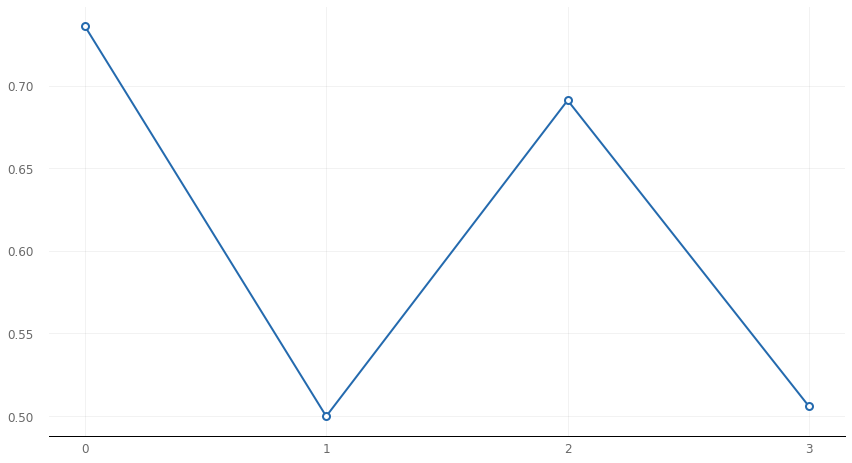

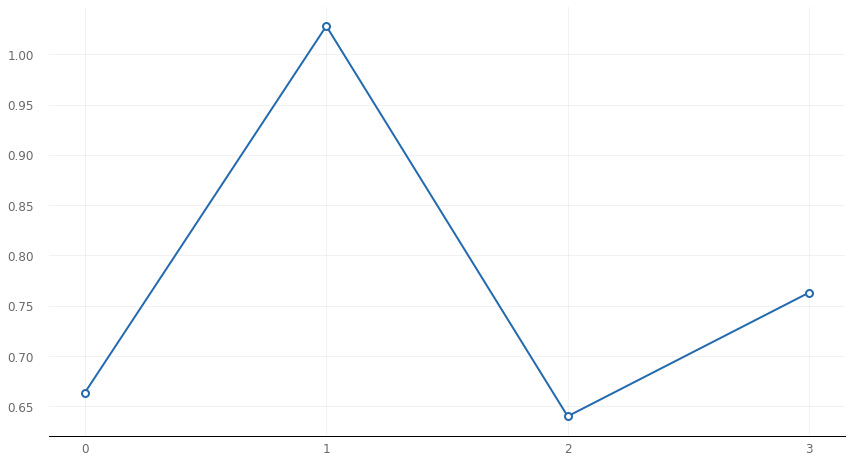

In [ ]:
r.plot_line('val_acc')
r.plot_line('val_loss')

In [ ]:
best_val = t.best_model(metric='val_accuracy', asc=False)